***GEOSPATIAL ANALYSIS OF GLOBAL GREEN HOUSE GAS EMISSION CONSIDERING THE GLOBAL POPULATION***

***OBJECTIVES***

***1. To Apply python based geospatial visualisation tool (e.g Geopandas) on real world dataset***

***2. To plot Choropleth maps of green house gas of some specific years.***

***3. To visualize the percentage change in greenhouse gass emission and check the correlation between mean green house gas emission and mean population.****

*** DATA SOURCE: Green house gas emission from world data Bank***

In [1]:
# Importing the needed Librariea for this Assesment
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [2]:
#IMPORTING THE GREENHOUSE GAS EMMISSION DATASET
greenhouse=pd.read_csv("API_EN.ATM.GHGT.KT.CE_DS2_en_csv_v2_1865570.csv", skiprows=4)
greenhouse

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,18168.860000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,41657.164846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,8898.640911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,40924.627691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,Zambia,ZMB,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,320254.218336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***EXPLORATORY DATA ANALYSIS***

In [5]:
#Checking the number of rows and columns of the dataset
greenhouse.shape

(264, 66)

In [6]:
#CHECKING THE DETAILS OF THE GREENHOUSE GAS EMMISSION DATAFRAME
greenhouse.info

<bound method DataFrame.info of      Country Name Country Code  \
0           Aruba          ABW   
1     Afghanistan          AFG   
2          Angola          AGO   
3         Albania          ALB   
4         Andorra          AND   
..            ...          ...   
259        Kosovo          XKX   
260   Yemen, Rep.          YEM   
261  South Africa          ZAF   
262        Zambia          ZMB   
263      Zimbabwe          ZWE   

                                        Indicator Name     Indicator Code  \
0    Total greenhouse gas emissions (kt of CO2 equi...  EN.ATM.GHGT.KT.CE   
1    Total greenhouse gas emissions (kt of CO2 equi...  EN.ATM.GHGT.KT.CE   
2    Total greenhouse gas emissions (kt of CO2 equi...  EN.ATM.GHGT.KT.CE   
3    Total greenhouse gas emissions (kt of CO2 equi...  EN.ATM.GHGT.KT.CE   
4    Total greenhouse gas emissions (kt of CO2 equi...  EN.ATM.GHGT.KT.CE   
..                                                 ...                ...   
259  Total greenhous

In [7]:
#Checking the 66 columns of the greenhouse gas emmission data set to have a full view of all the columns since its not displaying everyting above.
greenhouse.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [11]:
#Checking the null values in each column of the dataset and summing them up.
greenhouse.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              264
                 ... 
2017              264
2018              264
2019              264
2020              264
Unnamed: 65       264
Length: 66, dtype: int64

Considering how large the data is and checking the null value through with the code above didn't give a proper overview of the total number of null values. Therefore, It is important to have an overview of the kind of dataset i am working with and to see the number of null values in the dataset. So i am going to use heatmap to visualize the null values in the data set.

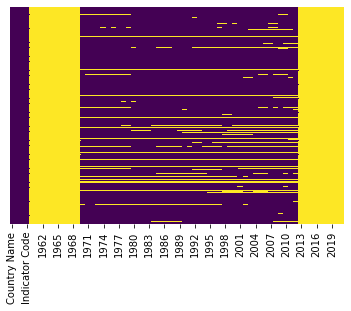

In [5]:
sns.heatmap(greenhouse.isnull(), yticklabels=False,cbar=False,cmap='viridis')

***The yellow part of the visualization above shows the part of the dataset with no values(null Values) while the purple parts shows the parts that has value input in the dataset. Filtering out the countries needed for proper and focused EDA and the years needed for this analysis is 2000 to 2010***

#Dropping the null values of the greenhouse gas emmission dataset

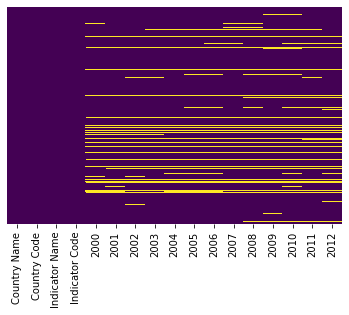

In [13]:
#Dropping the block yellow parts close to the left end and on the right
greenhouse=greenhouse[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2000', '2001', '2002', '2003','2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012']]
sns.heatmap(greenhouse.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [15]:
#CHecking the Statiscal Distribution of the dataset.
greenhouse.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
count,2.300000e+02,2.300000e+02,2.290000e+02,2.300000e+02,2.300000e+02,2.280000e+02,2.270000e+02,2.290000e+02,2.250000e+02,2.240000e+02,2.210000e+02,2.240000e+02,2.230000e+02
mean,1.629289e+06,1.617223e+06,1.747142e+06,1.807670e+06,1.843928e+06,1.949674e+06,2.017811e+06,2.076139e+06,2.012251e+06,1.996157e+06,2.149223e+06,2.246477e+06,2.279000e+06
std,4.565088e+06,4.552742e+06,4.928232e+06,5.090879e+06,5.241620e+06,5.505084e+06,5.753450e+06,5.879057e+06,5.720444e+06,5.718695e+06,6.136163e+06,6.439074e+06,6.565367e+06
min,4.896875e+00,4.907344e+00,5.034354e+00,5.041195e+00,5.039763e+00,5.042693e+00,5.045092e+00,5.052994e+00,5.062560e+00,5.068208e+00,5.109678e+00,5.175981e+00,5.239917e+00
25%,1.151943e+04,1.212971e+04,1.265601e+04,1.282721e+04,1.319181e+04,1.341309e+04,1.437292e+04,1.441614e+04,1.508259e+04,1.553820e+04,1.579435e+04,1.522774e+04,1.509677e+04
50%,6.835841e+04,6.782502e+04,7.083349e+04,7.467153e+04,7.082929e+04,7.505318e+04,7.417113e+04,7.713576e+04,7.523855e+04,7.454908e+04,7.907244e+04,8.019589e+04,8.043672e+04
75%,5.251454e+05,5.069766e+05,5.348393e+05,5.428833e+05,5.585663e+05,5.620581e+05,5.805686e+05,6.343747e+05,5.949822e+05,5.656398e+05,6.095866e+05,5.812919e+05,6.037533e+05
max,4.056344e+07,4.036567e+07,4.307057e+07,4.442230e+07,4.565890e+07,4.721606e+07,4.863999e+07,4.997739e+07,4.866444e+07,4.815062e+07,5.091111e+07,5.279053e+07,5.352630e+07


In [16]:
#Checking the null values of the needed years for this analysis
greenhouse.isnull().sum()

Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
2000              34
2001              34
2002              35
2003              34
2004              34
2005              36
2006              37
2007              35
2008              39
2009              40
2010              43
2011              40
2012              41
dtype: int64

***After careful consideration of the number of missing values which is about 14% of the total dataset in each column. I intend to replace the missing value with the mean of each of the column.***

In [18]:
#Replacing the missing values in each of the column that is needed for this Analysis.
greenhouse[['2000']]=greenhouse[['2000']].fillna(greenhouse[['2000']].mean())
greenhouse[['2001']]=greenhouse[['2001']].fillna(greenhouse[['2001']].mean())
greenhouse[['2002']]=greenhouse[['2002']].fillna(greenhouse[['2002']].mean())
greenhouse[['2003']]=greenhouse[['2003']].fillna(greenhouse[['2003']].mean())
greenhouse[['2004']]=greenhouse[['2004']].fillna(greenhouse[['2004']].mean())
greenhouse[['2005']]=greenhouse[['2005']].fillna(greenhouse[['2005']].mean())
greenhouse[['2006']]=greenhouse[['2006']].fillna(greenhouse[['2006']].mean())
greenhouse[['2007']]=greenhouse[['2007']].fillna(greenhouse[['2007']].mean())
greenhouse[['2008']]=greenhouse[['2008']].fillna(greenhouse[['2008']].mean())
greenhouse[['2009']]=greenhouse[['2009']].fillna(greenhouse[['2009']].mean())
greenhouse[['2010']]=greenhouse[['2010']].fillna(greenhouse[['2010']].mean())
greenhouse[['2011']]=greenhouse[['2011']].fillna(greenhouse[['2011']].mean())
greenhouse[['2012']]=greenhouse[['2012']].fillna(greenhouse[['2012']].mean())

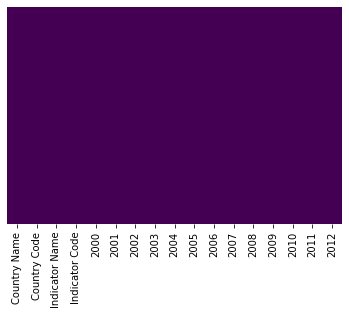

In [19]:
#Using heatmap to visualize our processed Dataset.
sns.heatmap(greenhouse.isnull(), yticklabels=False,cbar=False,cmap='viridis')

***The greenhouse dataset contains 264 rows which shows that it has some other additional inputs apart from the countries of the world because we have about 195 countries in the world. Filtering out the countries of the world because that is all we need. For this to be achieved, we have to read a dataset called naturalearth_lowres which contains all the countries in the world, iso_a3(country code), the geometry of each country. After calling this dataset, we will merge greenhouse gas emmission to it so that all the regional greenhouse gas emmision would be dropped and we would have a dataset that contains just the countries and the attributes of both the natural earthlowers and the former greenhousegas emmission***

In [20]:
#Reading the Natural Earth Lowers path
world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


***The natural earth lowres has 177 Rows which represents the countries which is needed for this task***

In [21]:
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

***Some of these columns in the world data are not needed, so we have to drop them***

In [22]:
#Dropping the columsn we don't need
world = world[['iso_a3', 'geometry']]
world.tail()

,iso_a3,geometry
172,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,-99,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."
176,SSD,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ..."


***Merging the greenhouse dataset with our new world data so that all the uneccesary data like the regional data which makes it 264 rows would be dropped and all we would have is just the greenhouse gas emmission of countries and the other attributes of both world and greenhouse, let it be our new "greenhouse". This is the greenhouse I will be using going forward.***

In [23]:
#Merging the two dataset.
greenhouse= world.merge(greenhouse, left_on = 'iso_a3', right_on='Country Code')
greenhouse

,iso_a3,geometry,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,FJI,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1.574685e+03,1.639360e+03,1.806999e+03,1.931688e+03,1.810480e+03,1.836070e+03,1.945971e+03,2.097696e+03,2.123963e+03,2.336075e+03,2.163922e+03,2.213243e+03,2.258173e+03
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,TZA,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2.159394e+05,1.967012e+05,1.836621e+05,2.597279e+05,2.213489e+05,2.695590e+05,1.675008e+05,2.022249e+05,2.014045e+05,2.314563e+05,2.341472e+05,2.347620e+05,2.353531e+05
2,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CAN,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,7.606430e+05,7.185345e+05,9.086862e+05,9.513730e+05,1.040137e+06,8.497987e+05,8.949226e+05,8.920668e+05,9.089260e+05,7.498637e+05,7.641377e+05,1.033482e+06,1.027064e+06
3,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,USA,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,6.969124e+06,6.821236e+06,6.981787e+06,6.991255e+06,7.244272e+06,7.182808e+06,6.994087e+06,7.128952e+06,6.648991e+06,6.604069e+06,6.713349e+06,6.571654e+06,6.343841e+06
4,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,KAZ,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2.073954e+05,2.236069e+05,2.858843e+05,2.567990e+05,2.851974e+05,2.916410e+05,3.248125e+05,3.158401e+05,3.305121e+05,2.878011e+05,3.473561e+05,3.504757e+05,3.665022e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,MKD,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",North Macedonia,MKD,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1.629289e+06,1.617223e+06,1.747142e+06,1.807670e+06,1.125100e+04,1.159160e+04,1.155934e+04,1.246544e+04,1.174282e+04,1.163937e+04,1.225754e+04,1.264571e+04,1.299225e+04
163,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,SRB,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1.629289e+06,1.617223e+06,1.747142e+06,1.807670e+06,1.843928e+06,1.949674e+06,2.017811e+06,2.076139e+06,2.012251e+06,1.996157e+06,2.149223e+06,2.246477e+06,2.279000e+06
164,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,MNE,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1.629289e+06,1.617223e+06,1.747142e+06,1.807670e+06,1.843928e+06,1.949674e+06,2.017811e+06,2.076139e+06,2.012251e+06,1.996157e+06,2.149223e+06,2.246477e+06,2.279000e+06
165,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,TTO,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2.411181e+04,2.525193e+04,1.747142e+06,3.143972e+04,3.841506e+04,4.392204e+04,5.200472e+04,5.130810e+04,5.455347e+04,5.488234e+04,5.806876e+04,5.977658e+04,6.130853e+04


***The new greenhouse has 167 Rows which represents the countries of the world unlike the 264 rows the unnecesary parts has been filtered out and all we have now is a new dataset***

***DRAWING THE CHOROPLETH MAP FOR THE GREENHOUSE GAS EMISSION FOR YEAR 2000***

***This can be achieved by filtering out the iso_a3, geometry and the greenhouse gas emmission for the year 2000. Then use mapplot to draw the choroplet map***

In [24]:
#Filtering out the needed colum
greenhouse2000=greenhouse[['iso_a3', 'geometry', '2000']]
greenhouse2000.head()

,iso_a3,geometry,2000
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1.574685e+03
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",2.159394e+05
2,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",7.606430e+05
3,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",6.969124e+06
4,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",2.073954e+05


***For proper visualization of the choropleth map, I had to plot the natural earth lowres map as the base, plot the choropleth map on it and using "ax=base" to combine the two maps. Also, i chose the scheme to be quantiles to have a clear understanding of the different colors used for the shadding of the choropleth map***

C:\Anaconda3\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
C:\Anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


Text(0.5, 1, 'THE CHOROPLETH MAP FOR THE GREENHOUSE GAS EMMISSION FOR THE YEAR 2000')

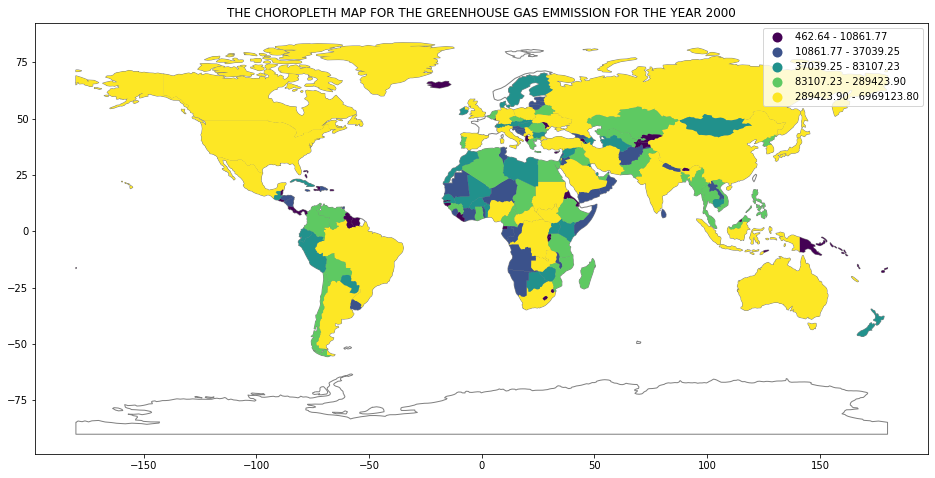

In [25]:
#Drawing the choroplet map with matpliotlip for the Greenhouse gas emmision for the year 2000
base = world.plot(color='white', edgecolor='grey', figsize=(16,12))
greenhouse2000.plot(column='2000', ax= base, legend="True", scheme="quantiles", figsize=(16, 12))
plt.title("THE CHOROPLETH MAP FOR THE GREENHOUSE GAS EMMISSION FOR THE YEAR 2000")

***INTEPRETATION***
***The map shows the greenhouse gas emission of countries for the year 2000, The countries shaded yellow like USA, Canad has the highest greenhouse gas emission followed by the light green then the dark green according to the legend on the top right.***

***DRAWING THE CHOROPLETH MAP FOR THE YEAR 2010***

***This can be achieved by filtering out the iso_a3, geometry and the greenhouse gas emmission for the year 2010. Then use mapplot to draw the choroplet map***

In [26]:
#Filtering the needed column
greenhouse2010=greenhouse[['iso_a3', 'geometry', '2010']]
greenhouse2010.head()

,iso_a3,geometry,2010
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",2.163922e+03
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",2.341472e+05
2,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",7.641377e+05
3,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",6.713349e+06
4,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",3.473561e+05


***For proper visualization of the choropleth map, I had to plot the natural earth lowres map as the base, plot the choropleth map on it and using "ax=base" to combine the two maps. Also, i chose the scheme to be quantiles to have a clear understanding of the different colors used for the shadding of the choropleth map***

Text(0.5, 1, 'THE CHOROPLETH MAP OF THE GREENHOUSE GAS EMMISSION FOR THE YEAR 2010')

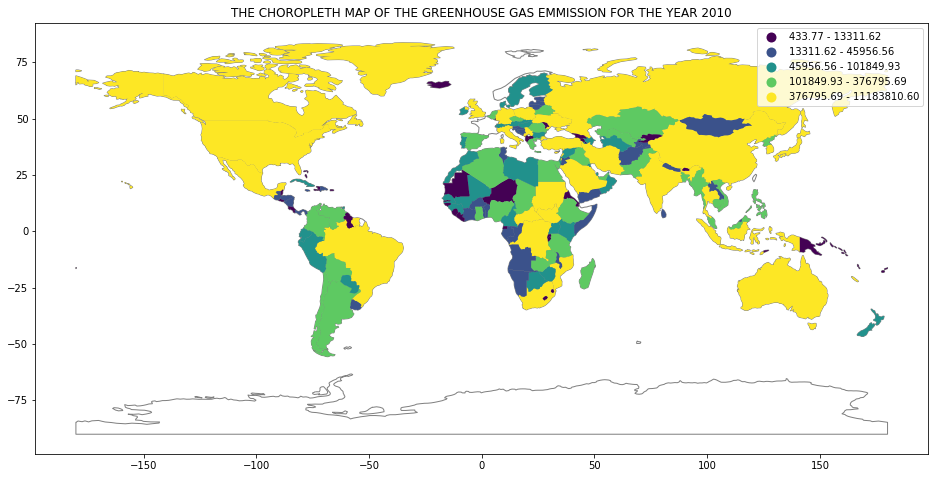

In [27]:
#Drawing the choroplet map with matpliotlip for the Greenhouse gas emmision for the year 2010

base = world.plot(color='white', edgecolor='grey', figsize=(16,12))
greenhouse2010.plot(column='2010', ax=base, legend="True", scheme="quantiles", figsize=(16, 12))
plt.title("THE CHOROPLETH MAP OF THE GREENHOUSE GAS EMMISSION FOR THE YEAR 2010")

***Interpretation***
***The graph above is showing the green house gas emission of countries in year 2010 with countries in North America, north Asian Countries, eastern Europe, Australia, having the highest greenhouse gas emmission, majority of African countries have moderate greenhouse gas emission except some South African Countries.***

***IMPORTING THE POPULATION DATASET***

In [33]:
#Reading the Population Dataset
worldpop= pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_4485025.csv", skiprows=4)
worldpop

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1806279.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0,30490639.0,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0,60041996.0,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0,18920657.0,NaN


In [35]:
worldpop.shape

(266, 67)

In [36]:
worldpop.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,...,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,0.0
mean,1.172174e+08,1.187633e+08,1.208717e+08,1.234910e+08,1.261315e+08,1.288372e+08,1.316853e+08,1.345256e+08,1.374350e+08,1.404490e+08,...,2.912969e+08,2.951160e+08,2.989277e+08,3.027560e+08,3.065980e+08,3.103591e+08,3.140425e+08,3.176734e+08,3.210893e+08,NaN
std,3.695745e+08,3.739180e+08,3.804316e+08,3.889142e+08,3.974401e+08,4.062000e+08,4.155171e+08,4.247722e+08,4.342805e+08,4.441772e+08,...,9.129343e+08,9.241050e+08,9.352101e+08,9.463321e+08,9.575052e+08,9.683483e+08,9.788967e+08,9.891628e+08,9.988295e+08,NaN
min,2.833000e+03,3.077000e+03,3.367000e+03,3.703000e+03,4.063000e+03,4.460000e+03,4.675000e+03,4.922000e+03,5.194000e+03,5.461000e+03,...,1.020800e+04,1.028900e+04,1.037400e+04,1.047400e+04,1.057700e+04,1.067800e+04,1.076400e+04,1.083400e+04,1.087300e+04,NaN
25%,5.022802e+05,5.109642e+05,5.206540e+05,5.311622e+05,5.421252e+05,5.533362e+05,5.647475e+05,5.823645e+05,5.981078e+05,6.100030e+05,...,1.574621e+06,1.609909e+06,1.645868e+06,1.689616e+06,1.716772e+06,1.740174e+06,1.751950e+06,1.767996e+06,1.791783e+06,NaN
50%,3.718330e+06,3.826398e+06,3.929109e+06,4.015834e+06,4.124521e+06,4.242788e+06,4.326013e+06,4.387887e+06,4.474171e+06,4.550402e+06,...,9.948838e+06,1.001582e+07,1.022085e+07,1.036160e+07,1.040671e+07,1.045548e+07,1.047907e+07,1.052565e+07,1.054019e+07,NaN
75%,2.636053e+07,2.721235e+07,2.808607e+07,2.890669e+07,2.972333e+07,3.055227e+07,3.134845e+07,3.200449e+07,3.244145e+07,3.277149e+07,...,6.120753e+07,6.174243e+07,6.182699e+07,6.187352e+07,6.191725e+07,6.193141e+07,6.150589e+07,6.157091e+07,6.295547e+07,NaN
max,3.032156e+09,3.071596e+09,3.124561e+09,3.189656e+09,3.255146e+09,3.322047e+09,3.392098e+09,3.461620e+09,3.532783e+09,3.606554e+09,...,7.175500e+09,7.261847e+09,7.347679e+09,7.433651e+09,7.519371e+09,7.602716e+09,7.683806e+09,7.763933e+09,7.836631e+09,NaN


In [37]:
worldpop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [34]:
worldpop.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                2
                 ... 
2018                2
2019                2
2020                2
2021                2
Unnamed: 66       266
Length: 67, dtype: int64

*** Considering how large the data is, It is important to have an overview of the kind of dataset i am working with and to see the number of null values in the dataset. So i am going to use heatmap to visualize the null values in the data set.***

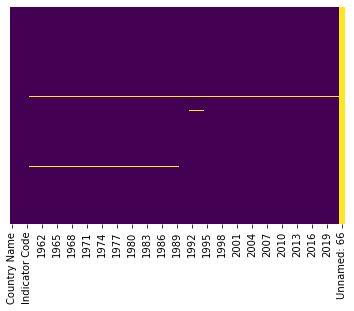

In [18]:
#Using heatmap to view the null values
sns.heatmap(worldpop.isnull(), yticklabels=False,cbar=False,cmap='viridis')

***The dataset have just a little null value and that is insignificant***

***The worldpop dataset above has 266 Rows and 67 Columns. Cleaning the data by merging it with the natural earth lowres so that I can have the population of just the countries that are needed in this context.***

In [38]:
#Merging the world population dataset with the natural earth lowres
worldpop= world.merge(worldpop, left_on = 'iso_a3', right_on='Country Code')
worldpop

,iso_a3,geometry,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,FJI,"Population, total",SP.POP.TOTL,393480.0,407244.0,421673.0,436303.0,...,865602.0,866447.0,868632.0,872406.0,877460.0,883490.0,889955.0,896444.0,902899.0,NaN
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,TZA,"Population, total",SP.POP.TOTL,10052151.0,10346695.0,10651954.0,10968196.0,...,48483132.0,49960563.0,51482638.0,53049231.0,54660345.0,56313444.0,58005461.0,59734213.0,61498438.0,NaN
2,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CAN,"Population, total",SP.POP.TOTL,17909009.0,18271000.0,18614000.0,18964000.0,...,35082954.0,35437435.0,35702908.0,36109487.0,36545236.0,37065084.0,37601230.0,38037204.0,38246108.0,NaN
3,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,USA,"Population, total",SP.POP.TOTL,180671000.0,183691000.0,186538000.0,189242000.0,...,316059947.0,318386329.0,320738994.0,323071755.0,325122128.0,326838199.0,328329953.0,331501080.0,331893745.0,NaN
4,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,KAZ,"Population, total",SP.POP.TOTL,9934564.0,10349422.0,10756931.0,11147860.0,...,17035551.0,17288285.0,17542806.0,17794055.0,18037776.0,18276452.0,18513673.0,18755666.0,19002586.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,MKD,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",North Macedonia,MKD,"Population, total",SP.POP.TOTL,1488670.0,1507647.0,1527109.0,1547449.0,...,2064032.0,2067471.0,2070226.0,2072490.0,2074502.0,2076217.0,2076694.0,2072531.0,2065092.0,NaN
163,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,SRB,"Population, total",SP.POP.TOTL,6608000.0,6655000.0,6696000.0,6732000.0,...,7164132.0,7130576.0,7095383.0,7058322.0,7020858.0,6982604.0,6945235.0,6899126.0,6844078.0,NaN
164,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,MNE,"Population, total",SP.POP.TOTL,480579.0,491140.0,502558.0,513409.0,...,621207.0,621810.0,622159.0,622303.0,622373.0,622227.0,622028.0,621306.0,620173.0,NaN
165,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,TTO,"Population, total",SP.POP.TOTL,847973.0,864814.0,879436.0,891948.0,...,1353708.0,1362337.0,1370332.0,1377563.0,1384060.0,1389841.0,1394969.0,1399491.0,1403374.0,NaN


***DRAWING CHOROPLETH MAP OF THE YEAR 2005 FOR THE GREEHOUSE GAS EMISSION FOR COUNTRIES HAVING POPULATION LESS THANK 109856670.***

***To generate Choropleth maps of GREENHOUSE GAS EMMISSION For countries having population less than 109856670. First we have to filter out the the "2005", iso_a3, and the country name column from the greenhouse data, then the do thesame for the world population, merge the two dataset together and filter out the countries with population that is less than 109856670 from the new dataset.***  

In [39]:
#Filtering out from the greenhouse dataset and assigning it to a varialble called greenhouse2005
greenhouse2k5=greenhouse[['iso_a3', 'Country Name', '2005','geometry']]
greenhouse2k5

,iso_a3,Country Name,2005,geometry
0,FJI,Fiji,1.836070e+03,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,TZA,Tanzania,2.695590e+05,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,CAN,Canada,8.497987e+05,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
3,USA,United States,7.182808e+06,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
4,KAZ,Kazakhstan,2.916410e+05,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
...,...,...,...,...
162,MKD,North Macedonia,1.159160e+04,"POLYGON ((22.38053 42.32026, 22.88137 41.99930..."
163,SRB,Serbia,1.949674e+06,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
164,MNE,Montenegro,1.949674e+06,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
165,TTO,Trinidad and Tobago,4.392204e+04,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [40]:
#Filtering out from the worldpop dataset and assigning it to a varialble called worldpop2k5
worldpop2k5=worldpop[['Country Name', '2005']]
worldpop2k5

,Country Name,2005
0,Fiji,821606.0
1,Tanzania,38450323.0
2,Canada,32243753.0
3,United States,295516599.0
4,Kazakhstan,15147029.0
...,...,...
162,North Macedonia,2036855.0
163,Serbia,7440769.0
164,Montenegro,614261.0
165,Trinidad and Tobago,1296497.0


In [41]:
#Merging the two dataframe to give a new data frame named greenworld2k5
greenworld2k5= greenhouse2k5.merge(worldpop2k5, on='Country Name', suffixes=('_co2', '_pop'))
greenworld2k5

,iso_a3,Country Name,2005_co2,geometry,2005_pop
0,FJI,Fiji,1.836070e+03,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",821606.0
1,TZA,Tanzania,2.695590e+05,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",38450323.0
2,CAN,Canada,8.497987e+05,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",32243753.0
3,USA,United States,7.182808e+06,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",295516599.0
4,KAZ,Kazakhstan,2.916410e+05,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",15147029.0
...,...,...,...,...,...
160,MKD,North Macedonia,1.159160e+04,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",2036855.0
161,SRB,Serbia,1.949674e+06,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",7440769.0
162,MNE,Montenegro,1.949674e+06,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",614261.0
163,TTO,Trinidad and Tobago,4.392204e+04,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",1296497.0


***After merging the two dataframe, we have to filter by countries that has population less than 109856670 and draw the choropleth map of the countries left***

In [42]:
#Filtering out countries that has populations that are less than 109856670 and assinging it to a variable greenworld109
greenworld109= greenworld2k5[greenworld2k5['2005_pop']<109856670]
greenworld109

,iso_a3,Country Name,2005_co2,geometry,2005_pop
0,FJI,Fiji,1.836070e+03,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",821606.0
1,TZA,Tanzania,2.695590e+05,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",38450323.0
2,CAN,Canada,8.497987e+05,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",32243753.0
4,KAZ,Kazakhstan,2.916410e+05,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",15147029.0
5,UZB,Uzbekistan,1.675684e+05,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",26167000.0
...,...,...,...,...,...
160,MKD,North Macedonia,1.159160e+04,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",2036855.0
161,SRB,Serbia,1.949674e+06,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",7440769.0
162,MNE,Montenegro,1.949674e+06,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",614261.0
163,TTO,Trinidad and Tobago,4.392204e+04,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",1296497.0


***After filtering countries with population less that 109.8m we can see that about 10 countries were filtered out and we are left with 155 countries that has population less than that. We can now use matplotlib library to draw a choroplet map for the greenhouse gas emmission for countries less than that i.e choroplet map for the 2005_co2 column which represent the greenhouse gas emmission for the countries that are left after filtering by population less than 109.8m***

***For proper visualization of the choropleth map, I had to plot the natural earth lowres map as the base, plot the choropleth map on it and using "ax=base" to combine the two maps. Also, i chose the scheme to be quantiles to have a clear understanding of the different colors used for the shadding of the choropleth map***

Text(0.5, 1, 'THE CHOROPLETH MAP OF THE GREENHOUSE GAS EMMISSION FOR COUNTRIES WITH POPULATION LESS THAN 109856670 IN YEAR 2005')

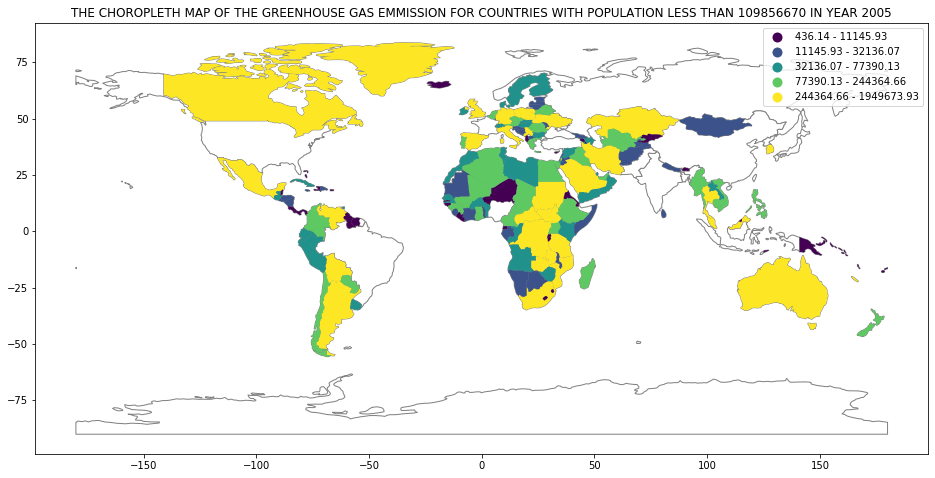

In [43]:
base = world.plot(color='white', edgecolor='grey', figsize=(16,12))
greenworld109.plot(column='2005_co2', ax=base, legend='True', scheme="quantiles", figsize=(16,12))
plt.title("THE CHOROPLETH MAP OF THE GREENHOUSE GAS EMMISSION FOR COUNTRIES WITH POPULATION LESS THAN 109856670 IN YEAR 2005")

***INTERPRETATION***

***From the choropleth map above, we can see that countries which are known to have populations more than 109.8 million like USA, INDONESIA, CHINA, NIGERIA, RUSSIA,BRAZIL, INDIA, BAGLADESH, PAKISTAN and JAPAN are not shaded in the choropleth map.The shaded countries like Canada, Mexico, All countries in Africa except Nigera, Australia and Southern Europe all have population that is less than 109.8Million***

***DRAWING CHOROPLETH MAP FOR THE YEAR 2005 FOR THE GREEN HOUSE GAS EMISSION FOR COUNTRIES WITH POPULATION GREATER THAN 236200507***

***To generate a choropleth map for the green house gas emmission for the year 2005 of countries having population greater than 236200507, we will use the dataset 'greenworld2k5' and filter the 2005_pop column***

In [44]:
##Filtering out countries that has populations that are greater than 236200507 and assinging it to a variable greenworld236
greenworld236=greenworld2k5[greenworld2k5['2005_pop']>236200507]
greenworld236

,iso_a3,Country Name,2005_co2,geometry,2005_pop
3,USA,United States,7182808.40,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",2.955166e+08
92,IND,India,2117460.59,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",1.147610e+09
132,CHN,China,7803535.60,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",1.303720e+09


***For proper visualization of the choropleth map, I had to plot the natural earth lowres map as the base, plot the choropleth map on it and using "ax=base" to combine the two maps. Also, i chose the scheme to be quantiles to have a clear understanding of the different colors used for the shadding of the choropleth map***

Text(0.5, 1, 'THE CHOROPLETH MAP OF THE GREENHOUSE GAS EMMISSION FOR COUNTRIES WITH POPULATION GREATER THAN 236200507 IN YEAR 2005')

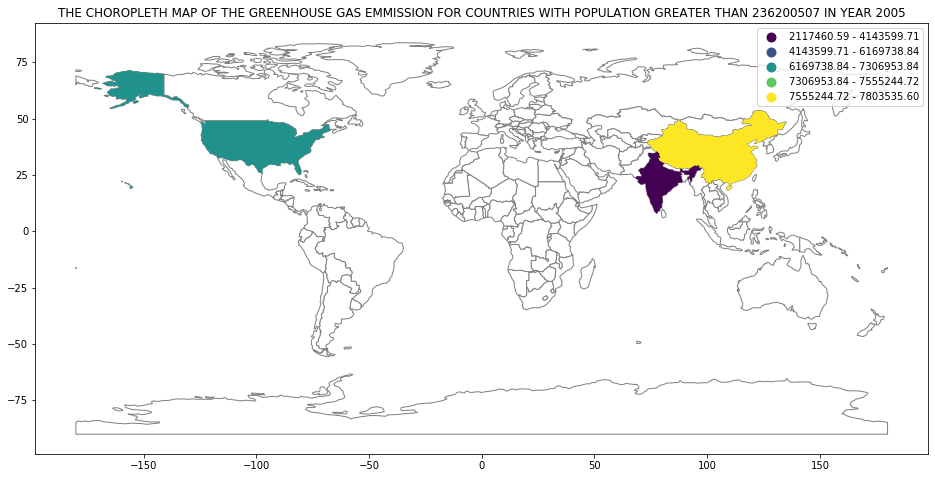

In [45]:
#Plotting the choropleth map
base = world.plot(color='white', edgecolor='grey', figsize=(16,12))


greenworld236.plot(column='2005_co2', ax=base, figsize=(16,12), scheme="quantiles", legend='True')

plt.title("THE CHOROPLETH MAP OF THE GREENHOUSE GAS EMMISSION FOR COUNTRIES WITH POPULATION GREATER THAN 236200507 IN YEAR 2005")

***INTERPRETATION***


***The choroplet map above shows the greenhouse gas emission of countries with population greater than 236200507 on the world map which are just few countries which are india, CHina and USA.China has the highest green house gas emission followed by USA and India***

***DRAWING CHOROPLETH MAP OF YEAR 2005 FOR GREENHOUSE GAS EMISSION OF COUNTRIES WITH POPULATION BETWEEN 842881 AND 80890450***


***To generate a choropleth map for the greenhouse gas emmission for the year 2005 of countries having population between 842881 and 80890450, we will use the dataset 'greenworld2k5' and filter from the 2005_pop column for countries with this population. Assign this to 'greenworldbetween'***

***Using the function .between() to filter out the countries that has population between this range including countries that has the population of 842881 and 80890450 which is why the "inclusive=True" is included, if the countries with that exact population is not needed then it would be "inclusive=false"***


In [46]:
#Using the function .between to generate to filter out the countries that has population between this range and including countries that has the population of 842881 and 80890450 which is why the "inclusive=True" is included, if they don't need to be included then its going to be "inclusive=false"
greenworldbetween = greenworld2k5[greenworld2k5['2005_pop'].between(842881, 80890450, inclusive=True)]
greenworldbetween

,iso_a3,Country Name,2005_co2,geometry,2005_pop
1,TZA,Tanzania,2.695590e+05,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",38450323.0
2,CAN,Canada,8.497987e+05,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",32243753.0
4,KAZ,Kazakhstan,2.916410e+05,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",15147029.0
5,UZB,Uzbekistan,1.675684e+05,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",26167000.0
6,PNG,Papua New Guinea,9.453034e+03,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",6494902.0
...,...,...,...,...,...
159,BIH,Bosnia and Herzegovina,2.078036e+04,"POLYGON ((18.56000 42.65000, 17.67492 43.02856...",3765332.0
160,MKD,North Macedonia,1.159160e+04,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",2036855.0
161,SRB,Serbia,1.949674e+06,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",7440769.0
163,TTO,Trinidad and Tobago,4.392204e+04,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",1296497.0


***For proper visualization of the choropleth map, I had to plot the natural earth lowres map as the base, plot the choropleth map on it and using "ax=base" to combine the two maps. Also, i chose the scheme to be quantiles to have a clear understanding of the different colors used for the shadding of the choropleth map***

Text(0.5, 1, 'CHOROPLETH MAP OF GREENHOUSE GAS EMMISSION FOR COUNTRIES WITH POPULATION BETWEEN 842881 & 80890450 IN YEAR 2005')

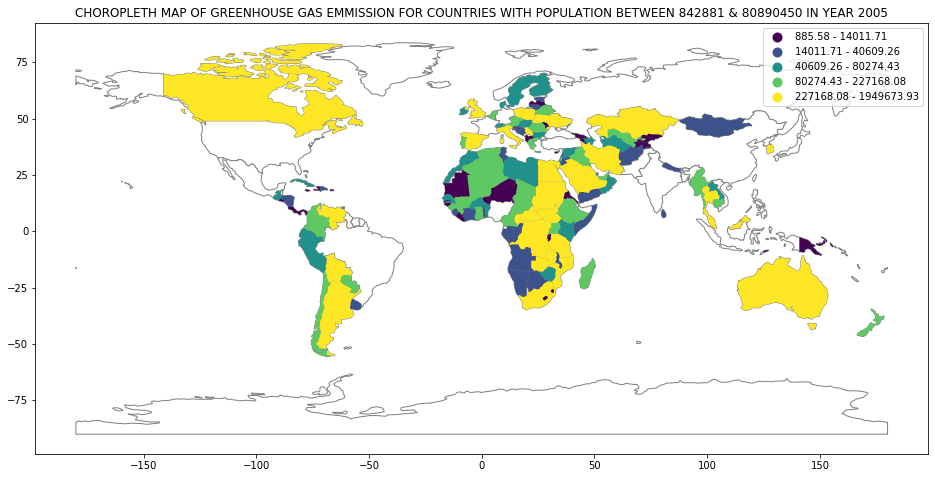

In [47]:
base = world.plot(color='white', edgecolor='grey', figsize=(16,12))

greenworldbetween.plot(column='2005_co2', ax=base, legend='True', scheme="quantiles", figsize=(16,12))

plt.title("CHOROPLETH MAP OF GREENHOUSE GAS EMMISSION FOR COUNTRIES WITH POPULATION BETWEEN 842881 & 80890450 IN YEAR 2005")

***INTERPRETATION***


***The Choroplet map of countries that has population greater than 80890450 such as Nigeria, CHina, INdia and USA are not included and countries with population less than 842881 are not included too because they were filtered out.The Choropleth map above is the greenhouse gas emission of countries that has population roughly between 843Thousand and 81million. Australia, Canada, UK, Some South American countries, Some Eastern and Southern Africa has the highest green house gas emission***

***PLOTING A SCATTER PLOT OF THE PERCENTAGE CHANGE IN GREENHOUSE GAS EMISSION FROM 2000 TO 2010 FOR THE COUNTRY WITH THE HIGHEST POPULATION***

***To do this, We have to search for the countries with the highest population in 2010 from the worldpop dataset. Using the .max() function to know the population with the highest number, then try to filter out the row in order to find out the name of the country. Furthermore, filter out the country from the greenhouse dataset and assigned it to another variable. Then filtered out the needed year from this variable then worked on it.***

In [48]:
#Filtering out the Maximum number in the year 2010 from the world population dataset
worldpopmax=worldpop["2010"].max()
worldpopmax

1337705000.0

In [49]:
#Filtering out the row to find out the name of the country.
print(worldpop[worldpop['2010'] == worldpop['2010'].max()])

    iso_a3                                           geometry Country Name  \
134    CHN  MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...        China   

    Country Code     Indicator Name Indicator Code         1960         1961  \
134          CHN  Population, total    SP.POP.TOTL  667070000.0  660330000.0   

            1962         1963  ...          2013          2014          2015  \
134  665770000.0  682335000.0  ...  1.363240e+09  1.371860e+09  1.379860e+09   

             2016          2017          2018          2019          2020  \
134  1.387790e+09  1.396215e+09  1.402760e+09  1.407745e+09  1.411100e+09   

             2021  Unnamed: 66  
134  1.412360e+09          NaN  

[1 rows x 69 columns]


In [50]:
#Filtering the China column from the greenhouse gas dataset
greenhouseCHN= greenhouse[greenhouse['Country Name'] == 'China']
greenhouseCHN

,iso_a3,geometry,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
134,CHN,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",China,CHN,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,5082325.6,5145521.55,5474914.9,6226962.5,7116642.4,7803535.6,8573395.4,9124046.5,10022024.8,10617264.9,11183810.6,1.206426e+07,1.245471e+07


In [51]:
#Filtering out the needed year from 2000 to 2010
greenhouseCHNY=greenhouseCHN[['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010']]
greenhouseCHNY

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
134,5082325.6,5145521.55,5474914.9,6226962.5,7116642.4,7803535.6,8573395.4,9124046.5,10022024.8,10617264.9,11183810.6


In [52]:
#Calculating the Percentage change for the years from 2000 to 2010 using the .pct_change() function

greenhouseCHINN=greenhouseCHNY.pct_change(axis='columns')
greenhouseCHINN

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
134,NaN,0.012434,0.064016,0.137362,0.142875,0.096519,0.098655,0.064228,0.098419,0.059393,0.053361


In [53]:
#Transposing the dataframe into two column for me to plot the line plot.
greenhouseCHINA=greenhouseCHINN.melt(var_name='Year', value_name='percentage_change')
greenhouseCHINA

,Year,percentage_change
0,2000,NaN
1,2001,0.012434
2,2002,0.064016
3,2003,0.137362
4,2004,0.142875
5,2005,0.096519
6,2006,0.098655
7,2007,0.064228
8,2008,0.098419
9,2009,0.059393


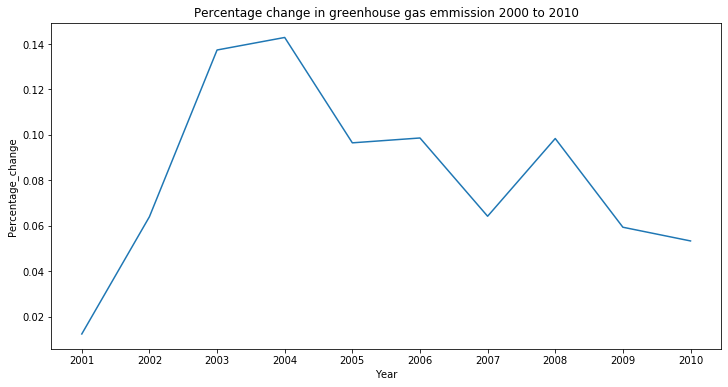

In [55]:
#Scattere Plot for the percentage change. 
plt.rcParams['figure.figsize'] = (12,6)
plt.plot(greenhouseCHINA.Year,greenhouseCHINA.percentage_change) 
plt.xlabel("Year") 
plt.ylabel("Percentage_change") 
plt.title("Percentage change in greenhouse gas emmission 2000 to 2010")
plt.show()

***INTERPRETATION: The graph above shows the percentage change in the green house gas emmission from the year 2000 to 2010. The change shows that the the gas emmission was increasing from 2001 to 2004 before there is a steady decrease in the greenhouse gas emmission from 2004 to 2007 and a rise in 2008 before the steady decrease to 2010. This might be because of cautious effort towards a cleaner air in the society,the transition from the use of fossil fuels(oil, gas & coal) to a clean, green and sustainable source of energy(wind, solar,geothermal,hydrothermal)  and the sensitization about global greenhouse effect***

***DRAWING A SCATTER PLOT FINDING THE CORELLATION BETWEEN THE MEAN POPULATION OF EACH COUNTRY AND MEAN GREEN HOUSE GAS EMISSION CONSIDERING THE YEAR 2000 TO 2010***

***Filter out the years from 2000 to 2010 then calculate the mean of their greenhouse gas emmission and add the column, do thesame for the world populatuon. The two mean column on both data set would be use to plot the scattered plot.***

In [57]:
#Filtering out the years needed from the greenhouse gas emmission and assinging it to a variable greenhouseF.
greenhouseF=greenhouse[['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010']]

#Adding the mean column to form a new dataset.
greenhouseF['mean_green'] = greenhouseF.mean(axis=1)
greenhouseF

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,mean_green
0,1.574685e+03,1.639360e+03,1.806999e+03,1.931688e+03,1.810480e+03,1.836070e+03,1.945971e+03,2.097696e+03,2.123963e+03,2.336075e+03,2.163922e+03,1.933355e+03
1,2.159394e+05,1.967012e+05,1.836621e+05,2.597279e+05,2.213489e+05,2.695590e+05,1.675008e+05,2.022249e+05,2.014045e+05,2.314563e+05,2.341472e+05,2.166975e+05
2,7.606430e+05,7.185345e+05,9.086862e+05,9.513730e+05,1.040137e+06,8.497987e+05,8.949226e+05,8.920668e+05,9.089260e+05,7.498637e+05,7.641377e+05,8.580990e+05
3,6.969124e+06,6.821236e+06,6.981787e+06,6.991255e+06,7.244272e+06,7.182808e+06,6.994087e+06,7.128952e+06,6.648991e+06,6.604069e+06,6.713349e+06,6.934539e+06
4,2.073954e+05,2.236069e+05,2.858843e+05,2.567990e+05,2.851974e+05,2.916410e+05,3.248125e+05,3.158401e+05,3.305121e+05,2.878011e+05,3.473561e+05,2.869860e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
162,1.629289e+06,1.617223e+06,1.747142e+06,1.807670e+06,1.125100e+04,1.159160e+04,1.155934e+04,1.246544e+04,1.174282e+04,1.163937e+04,1.225754e+04,6.258027e+05
163,1.629289e+06,1.617223e+06,1.747142e+06,1.807670e+06,1.843928e+06,1.949674e+06,2.017811e+06,2.076139e+06,2.012251e+06,1.996157e+06,2.149223e+06,1.895137e+06
164,1.629289e+06,1.617223e+06,1.747142e+06,1.807670e+06,1.843928e+06,1.949674e+06,2.017811e+06,2.076139e+06,2.012251e+06,1.996157e+06,2.149223e+06,1.895137e+06
165,2.411181e+04,2.525193e+04,1.747142e+06,3.143972e+04,3.841506e+04,4.392204e+04,5.200472e+04,5.130810e+04,5.455347e+04,5.488234e+04,5.806876e+04,1.982818e+05


In [58]:
#Filtering out the years needed from the worldpop and assinging it to a variable worldpopF.
worldpopF=worldpop[['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010']]

#Adding the mean column to the filtered worldpop
worldpopF['mean_pop']=worldpopF.mean(axis=1)
worldpopF

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,mean_pop
0,811011.0,813923.0,815257.0,816078.0,817864.0,821606.0,827869.0,836185.0,845356.0,853636.0,859816.0,8.289637e+05
1,33499177.0,34385849.0,35334790.0,36337778.0,37379766.0,38450323.0,39548666.0,40681416.0,41853944.0,43073830.0,44346532.0,3.862655e+07
2,30685730.0,31020902.0,31360079.0,31644028.0,31940655.0,32243753.0,32571174.0,32889025.0,33247118.0,33628895.0,34004889.0,3.229420e+07
3,282162411.0,284968955.0,287625193.0,290107933.0,292805298.0,295516599.0,298379912.0,301231207.0,304093966.0,306771529.0,309327143.0,2.957264e+08
4,14883626.0,14858335.0,14858948.0,14909019.0,15012984.0,15147029.0,15308085.0,15484192.0,15776938.0,16092822.0,16321872.0,1.533217e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
162,2026350.0,2034882.0,2020157.0,2026773.0,2032544.0,2036855.0,2040228.0,2043559.0,2046898.0,2050671.0,2055004.0,2.037629e+06
163,7516346.0,7503433.0,7496522.0,7480591.0,7463157.0,7440769.0,7411569.0,7381579.0,7350222.0,7320807.0,7291436.0,7.423312e+06
164,604950.0,607389.0,609828.0,612267.0,613353.0,614261.0,615025.0,615875.0,616969.0,618294.0,619428.0,6.134217e+05
165,1267159.0,1271627.0,1277210.0,1283564.0,1290115.0,1296497.0,1302552.0,1308450.0,1314449.0,1320921.0,1328144.0,1.296426e+06


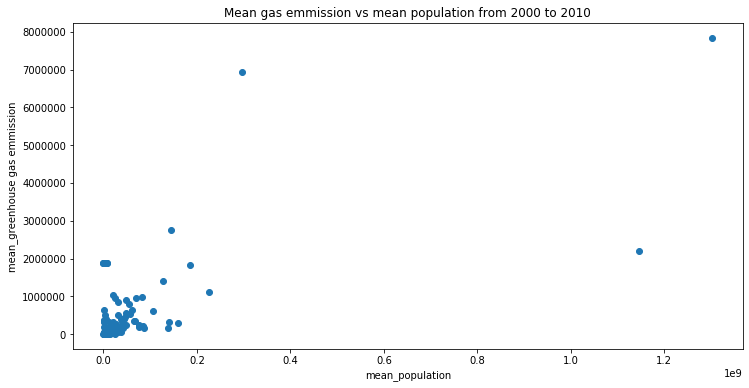

In [59]:
#Plotting a scattered plot with the mean column from both the greenhouseF and worldpopF
plt.scatter(worldpopF['mean_pop'], greenhouseF['mean_green'])
plt.xlabel("mean_population")
plt.ylabel("mean_greenhouse gas emmission")
plt.title('Mean gas emmission vs mean population from 2000 to 2010')
plt.show()

***The plot above shows there is mean greenhouse gas emmission vs the mean population but there are outliers in the graph, I have to remove the outlier for a better visualization. I have to plot the scattered plot between countries with mean greenhouse gass emission less than 4000000 and population less that 0.8 * 1e9 which 800000000*** 

***Filtering the  mean greenhouse gas emission less than 4Million and mean population less than 800Million***

In [60]:
worldpopR = worldpopF[worldpopF['mean_pop']<800000000]
greenhouseR=greenhouseF[greenhouseF['mean_green']<4000000]
worldpopR

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,mean_pop
0,811011.0,813923.0,815257.0,816078.0,817864.0,821606.0,827869.0,836185.0,845356.0,853636.0,859816.0,8.289637e+05
1,33499177.0,34385849.0,35334790.0,36337778.0,37379766.0,38450323.0,39548666.0,40681416.0,41853944.0,43073830.0,44346532.0,3.862655e+07
2,30685730.0,31020902.0,31360079.0,31644028.0,31940655.0,32243753.0,32571174.0,32889025.0,33247118.0,33628895.0,34004889.0,3.229420e+07
3,282162411.0,284968955.0,287625193.0,290107933.0,292805298.0,295516599.0,298379912.0,301231207.0,304093966.0,306771529.0,309327143.0,2.957264e+08
4,14883626.0,14858335.0,14858948.0,14909019.0,15012984.0,15147029.0,15308085.0,15484192.0,15776938.0,16092822.0,16321872.0,1.533217e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
162,2026350.0,2034882.0,2020157.0,2026773.0,2032544.0,2036855.0,2040228.0,2043559.0,2046898.0,2050671.0,2055004.0,2.037629e+06
163,7516346.0,7503433.0,7496522.0,7480591.0,7463157.0,7440769.0,7411569.0,7381579.0,7350222.0,7320807.0,7291436.0,7.423312e+06
164,604950.0,607389.0,609828.0,612267.0,613353.0,614261.0,615025.0,615875.0,616969.0,618294.0,619428.0,6.134217e+05
165,1267159.0,1271627.0,1277210.0,1283564.0,1290115.0,1296497.0,1302552.0,1308450.0,1314449.0,1320921.0,1328144.0,1.296426e+06


In [61]:
greenhouseR

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,mean_green
0,1.574685e+03,1.639360e+03,1.806999e+03,1.931688e+03,1.810480e+03,1.836070e+03,1.945971e+03,2.097696e+03,2.123963e+03,2.336075e+03,2.163922e+03,1.933355e+03
1,2.159394e+05,1.967012e+05,1.836621e+05,2.597279e+05,2.213489e+05,2.695590e+05,1.675008e+05,2.022249e+05,2.014045e+05,2.314563e+05,2.341472e+05,2.166975e+05
2,7.606430e+05,7.185345e+05,9.086862e+05,9.513730e+05,1.040137e+06,8.497987e+05,8.949226e+05,8.920668e+05,9.089260e+05,7.498637e+05,7.641377e+05,8.580990e+05
4,2.073954e+05,2.236069e+05,2.858843e+05,2.567990e+05,2.851974e+05,2.916410e+05,3.248125e+05,3.158401e+05,3.305121e+05,2.878011e+05,3.473561e+05,2.869860e+05
5,1.659769e+05,1.684623e+05,1.760662e+05,1.735835e+05,1.713376e+05,1.675684e+05,1.735818e+05,1.738883e+05,1.839500e+05,1.739662e+05,1.727227e+05,1.728276e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
162,1.629289e+06,1.617223e+06,1.747142e+06,1.807670e+06,1.125100e+04,1.159160e+04,1.155934e+04,1.246544e+04,1.174282e+04,1.163937e+04,1.225754e+04,6.258027e+05
163,1.629289e+06,1.617223e+06,1.747142e+06,1.807670e+06,1.843928e+06,1.949674e+06,2.017811e+06,2.076139e+06,2.012251e+06,1.996157e+06,2.149223e+06,1.895137e+06
164,1.629289e+06,1.617223e+06,1.747142e+06,1.807670e+06,1.843928e+06,1.949674e+06,2.017811e+06,2.076139e+06,2.012251e+06,1.996157e+06,2.149223e+06,1.895137e+06
165,2.411181e+04,2.525193e+04,1.747142e+06,3.143972e+04,3.841506e+04,4.392204e+04,5.200472e+04,5.130810e+04,5.455347e+04,5.488234e+04,5.806876e+04,1.982818e+05


***Plotting the scattered plot with the filtered mean greenhouse gas emission and mean population.***

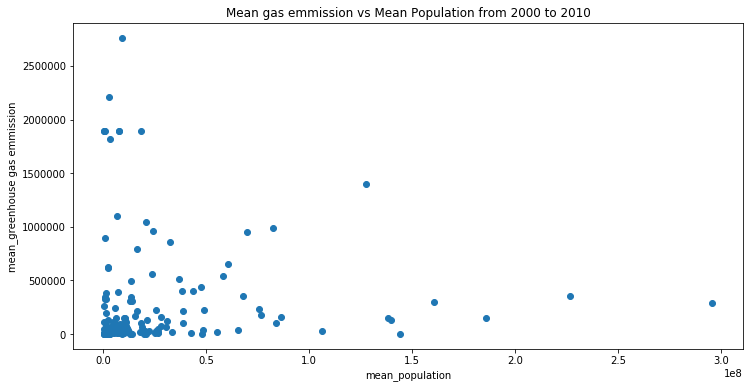

In [62]:
plt.scatter(worldpopR['mean_pop'], greenhouseR['mean_green'])
plt.xlabel("mean_population")
plt.ylabel("mean_greenhouse gas emmission")
plt.title('Mean gas emmission vs Mean Population from 2000 to 2010')
plt.show()

***INTERPRETATIION***

***The graph above shows a better visualization of the mean greenhouse gass emmission compared to the former one. By this scattered plot we can see that it has a positive correlation after removing the outliers. The number of rows reduced from 167 to 165 which is quite much, we can't really tell the strenght of the correlation because majority of the values are still in the cluster. Lets calculate the correlation coefficient.***

In [63]:
#Line4: filtering the mean population column, Line5: Filtering the mean grenhouse gas column
#joining the two table using pd.concat function.

meanpop=worldpopR[['mean_pop']]
meangreen= greenhouseR[['mean_green']]
meanpopgreen= pd.concat([meanpop, meangreen], axis="columns")
meanpopgreen

,mean_pop,mean_green
0,8.289637e+05,1.933355e+03
1,3.862655e+07,2.166975e+05
2,3.229420e+07,8.580990e+05
3,2.957264e+08,NaN
4,1.533217e+07,2.869860e+05
...,...,...
162,2.037629e+06,6.258027e+05
163,7.423312e+06,1.895137e+06
164,6.134217e+05,1.895137e+06
165,1.296426e+06,1.982818e+05


In [64]:
#Calculating the correlation using the .corr() function
meanpopgreen.corr()

,mean_pop,mean_green
mean_pop,1.000000,0.422797
mean_green,0.422797,1.000000


In [65]:
print('The correlation coefficient between the mean greenhouse and mean population after filtering the outliers is 0.422797')

The correlation coefficient between the mean greenhouse and mean population after filtering the outliers is 0.422797


***There is a moderate positive correlation coefficient between the mean greenhouse gas emission and mean population, for better understanding of the damage an outlier can do to our visualization, lets calculate the correlation with the outliers in our dataset***

In [66]:
#Filtering the mean population and mean greenhouse gas 
meanpopF=worldpopF[['mean_pop']]
meangreenF= greenhouseF[['mean_green']]
meanpopgreenF= pd.concat([meanpopF, meangreenF], axis="columns")
meanpopgreenF

,mean_pop,mean_green
0,8.289637e+05,1.933355e+03
1,3.862655e+07,2.166975e+05
2,3.229420e+07,8.580990e+05
3,2.957264e+08,6.934539e+06
4,1.533217e+07,2.869860e+05
...,...,...
162,2.037629e+06,6.258027e+05
163,7.423312e+06,1.895137e+06
164,6.134217e+05,1.895137e+06
165,1.296426e+06,1.982818e+05


In [67]:
meanpopgreenF.corr()


,mean_pop,mean_green
mean_pop,1.00000,0.69638
mean_green,0.69638,1.00000


In [68]:
print('The correlation coefficient is 0.69638')

The correlation coefficient is 0.69638


***0.69638 is a strong positive correlation which would have given us a false idea of the correlation between the mean greenhouse gas emission and mean population***